In [1]:
import time
import os
import matplotlib.pyplot as plt

In [2]:
def levenstein(str_1, str_2):
    n, m = len(str_1), len(str_2)
    if n > m:
        str_1, str_2 = str_2, str_1
        n, m = m, n

    current_row = range(n + 1)
    for i in range(1, m + 1):
        previous_row, current_row = current_row, [i] + [0] * n
        for j in range(1, n + 1):
            add, delete, change = previous_row[j] + 1, current_row[j - 1] + 1, previous_row[j - 1]
            if str_1[j - 1] != str_2[i - 1]:
                change += 1
            current_row[j] = min(add, delete, change)

    return current_row[n]

In [3]:
%%time
levenstein('гибралтар','лабрадор')

CPU times: user 63 µs, sys: 1 µs, total: 64 µs
Wall time: 67.9 µs


5

In [5]:
def Hirshberg(str1, str2):
    n, m = len(str1), len(str2)
    if m <= 1 or n <= 1:
        return max(m, n) - 1 if ((str1 in str2 or str2 in str1) and (n != 0 and m != 0)) else max(m, n)
    if n > m:
        str1, str2 = str2, str1
        n, m = m, n

    split_index = m // 2
    left_row =  [i for i in range(n + 1)]
    right_row = [i for i in range(n + 1)]
    for i in range(m // 2):
        prev_l_row, left_row = left_row, [i] + [0] * n
        prev_r_row, rigth_row = right_row, [i] + [0] * n
        for j in range(n + 1):
            add, delete, change = prev_l_row[j] + 1, left_row[j - 1] + 1, left_row[j - 1]
            if str1[j - 1] != str2[i - 1]:
                change += 1
            left_row[j] = min(add, delete, change)
            
            add, delete, change = prev_r_row[j] + 1, right_row[j - 1] + 1, right_row[j - 1]
            if str1[j - 1] != str2[m - i - 1]:
                change += 1
            right_row[j] = min(add, delete, change)

    for i in range(n+1):
        left_row[i] += right_row[i]

    return min(left_row)

In [6]:
%%time
Hirshberg('гибралтар','лабрадор')
# Hirshberg('c','bas')

CPU times: user 171 µs, sys: 2 µs, total: 173 µs
Wall time: 179 µs


5

In [10]:
text1 = './text1.txt'
text2 = './text2.txt'

In [12]:
text_1 = ''
with open(text1, 'r') as file:
    lines = file.readlines()
    for line in lines:
        text_1 += line.replace('\n', '').strip() + ' '

text_2 = ''
with open(text2, 'r') as file:
    lines = file.readlines()
    for line in lines:
        text_2 += line.replace('\n', '').strip() + ' '

In [13]:
len(text_2), len(text_1)

(44559, 48090)

In [14]:
n, m = 5, 7
w_length = []
w_diff = []
steps = []
times = []
while(n < len(text_1) and m < len(text_2)):
    w_length.append(n)
    w_diff.append(m-n)
    str_1 = text_1[:n]
    str_2 = text_2[:m]
    start = time.time()
    steps.append(levenstein(str_1, str_2))
    times.append(time.time() - start)
    n *= 2
    m *= 2

In [16]:
n, m = 5, 7
w_2_length = []
w_2_diff = []
steps_2 = []
times_2 = []
while(n < len(text_1) and m < len(text_2)):
    w_2_length.append(n)
    w_2_diff.append(m-n)
    str_1 = text_1[:n]
    str_2 = text_2[:m]
    start = time.time()
    steps_2.append(Hirshberg(str_1, str_2))
    times_2.append(time.time() - start)
    n *= 2
    m *= 2

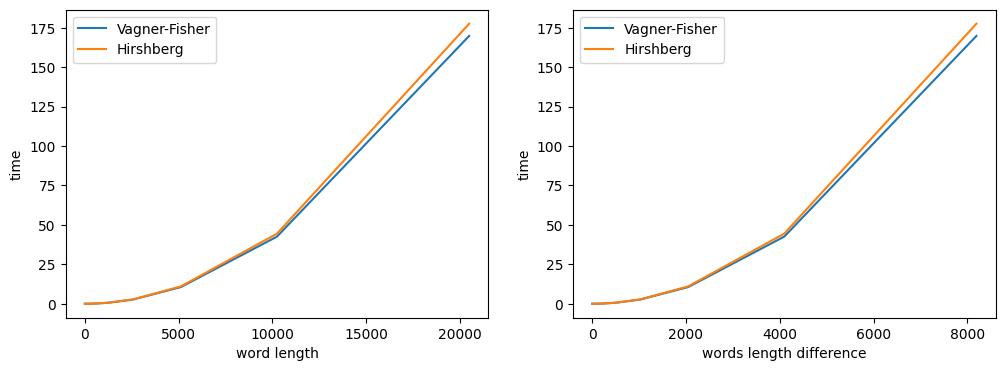

In [34]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))
axs[0].plot(w_length, times, label='Vagner-Fisher')
axs[0].plot(w_2_length, times_2, label='Hirshberg')
# axs[0].set_yscale('log')
axs[0].set_xlabel('string length')
axs[0].set_ylabel('time')
axs[0].legend()

axs[1].plot(w_diff, times, label='Vagner-Fisher')
axs[1].plot(w_2_diff, times_2, label='Hirshberg')
# axs[1].set_yscale('log')
axs[1].set_xlabel('string lengths difference')
axs[1].set_ylabel('time')
axs[1].legend()

plt.show()
